In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('recons-iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAAATTGGCGGAGTAAGCGCG...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 283027.92it/s]


[33, 88, 92, 97, 105, 117, 136, 138, 158, 146, 152, 173, 174, 187, 180, 210, 205, 221, 214, 232, 239, 258, 261, 277, 270, 293, 298, 301, 311, 321, 315, 328, 342, 353, 377, 370, 408, 382, 403, 429, 443, 432, 453, 451, 468, 463, 486, 477, 490, 505, 498, 524, 515, 518, 529, 558, 550, 569, 603, 582, 621, 616, 614, 623, 645, 642, 634, 666, 680, 684, 697, 698, 707, 720, 741, 743, 744, 765, 765, 783, 758, 780, 809, 830, 822, 838, 831, 826, 862, 851, 864, 896, 909, 918, 922, 923, 927, 930, 939, 963, 933, 989, 1009, 1004, 1013, 1005, 1048, 1026, 1042, 2121, 0]


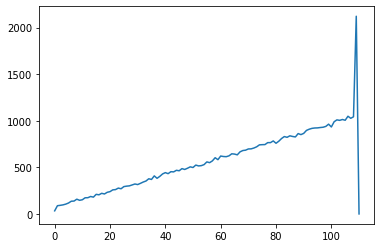

In [10]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [11]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 10000/10000 [00:02<00:00, 4573.56it/s]


In [12]:
import numpy as np


In [13]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [14]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

G -> A 13
G -> T 15
A -> G 17
G -> C 17
C -> A 17
C -> T 18
T -> G 18
A -> C 18
T -> A 20
C -> G 20
T -> C 21
A -> T 21
G ->  43
C ->  50
A ->  50
T ->  65
 -> A 546
 -> C 637
 -> G 655
 -> T 681


In [15]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [16]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


 -> G @ 5 6
 -> G @ 80 6
 -> C @ 20 6
 -> C @ 21 6
 -> C @ 33 6
 -> C @ 71 6
 -> C @ 73 6
 -> C @ 8 6
 -> C @ 88 6
 -> C @ 89 6
 -> G @ 105 6
 -> A @ 88 6
 -> G @ 64 6
 -> G @ 67 6
 -> G @ 82 6
 -> G @ 99 6
 -> A @ 82 6
 -> C @ 11 6
 -> T @ 96 6
 -> T @ 86 6
 -> T @ 98 6
 -> T @ 27 6
 -> T @ 89 6
 -> T @ 75 6
 -> T @ 34 6
 -> G @ 63 7
 -> G @ 108 7
 -> T @ 20 7
 -> T @ 70 7
 -> T @ 92 7
 -> G @ 88 7
 -> G @ 91 7
 -> G @ 95 7
 -> T @ 11 7
 -> A @ 39 7
 -> C @ 38 7
 -> A @ 1 8
 -> G @ 102 8
 -> C @ 69 9
 -> G @ 106 10
C -> A @ 110 12
G -> A @ 110 12
G -> T @ 110 12
 -> C @ 1 13
 -> T @ 1 13
C -> T @ 110 14
A -> G @ 110 14
 -> G @ 1 14
G -> C @ 110 15
A -> C @ 110 15
 -> T @ 0 15
 -> G @ 0 15
T -> A @ 110 16
T -> G @ 110 17
T -> C @ 110 18
A -> T @ 110 18
C -> G @ 110 18
 -> C @ 0 21
 -> A @ 0 27
G ->  @ 110 31
C ->  @ 110 36
A ->  @ 110 39
 -> A @ 110 44
 -> C @ 110 47
T ->  @ 110 49
 -> T @ 110 55
 -> G @ 110 65
 -> G @ 109 223
 -> A @ 109 224
 -> C @ 109 233
 -> T @ 109 260


In [17]:
import matplotlib.pyplot as plt

In [18]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[79, 48, 19, 7, 8, 14, 15, 9, 9, 8, 9, 17, 9, 16, 14, 5, 11, 10, 9, 12, 17, 15, 10, 11, 9, 8, 12, 12, 13, 15, 12, 13, 14, 18, 14, 9, 14, 12, 15, 18, 11, 11, 11, 10, 12, 10, 9, 13, 14, 5, 10, 9, 9, 17, 3, 7, 13, 13, 15, 13, 18, 10, 6, 18, 21, 7, 11, 13, 6, 16, 19, 13, 8, 18, 11, 14, 14, 13, 12, 18, 11, 9, 17, 8, 10, 10, 13, 8, 24, 20, 8, 13, 14, 8, 17, 13, 12, 13, 17, 12, 12, 7, 18, 14, 12, 18, 19, 11, 21, 941, 556]


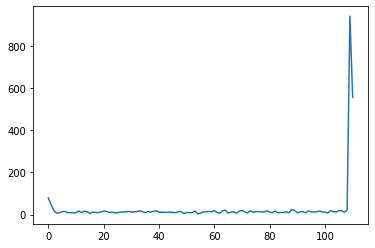

In [19]:
plt.plot(range(strand_len + 1), pos_counts)

In [20]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[15, 13, 2, 0, 3, 4, 5, 3, 0, 3, 4, 7, 3, 5, 2, 1, 2, 3, 3, 5, 7, 4, 1, 1, 4, 4, 2, 6, 3, 4, 3, 4, 5, 4, 6, 1, 4, 4, 0, 2, 5, 4, 3, 1, 5, 2, 3, 4, 4, 1, 3, 2, 4, 5, 0, 2, 3, 1, 4, 3, 5, 1, 0, 5, 5, 1, 2, 1, 1, 3, 7, 0, 3, 3, 3, 6, 5, 5, 1, 4, 0, 3, 1, 2, 3, 2, 6, 2, 5, 6, 1, 3, 7, 3, 4, 4, 6, 4, 6, 2, 1, 2, 1, 3, 5, 4, 3, 1, 4, 260, 55]


In [21]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


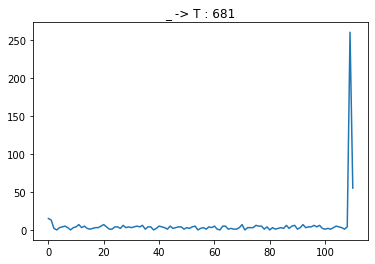

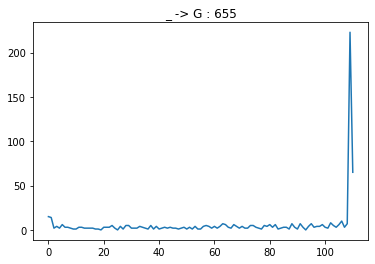

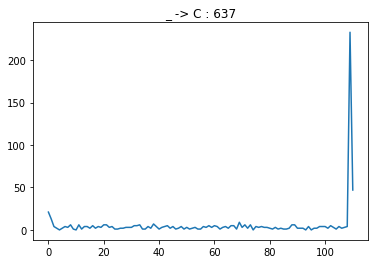

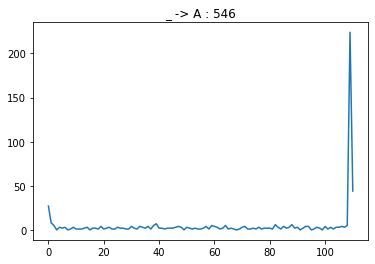

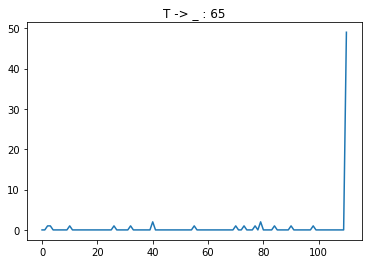

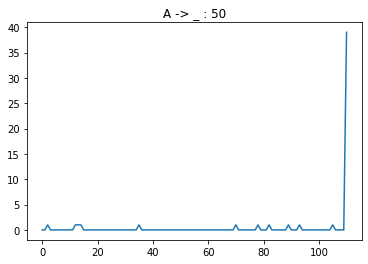

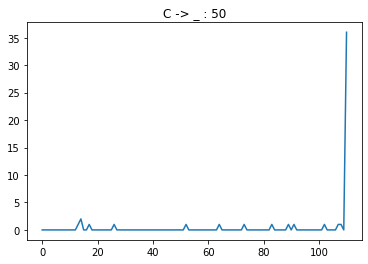

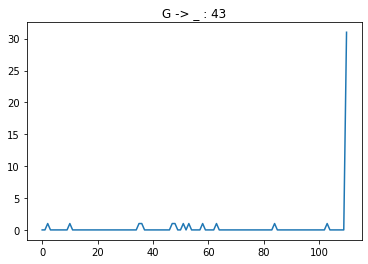

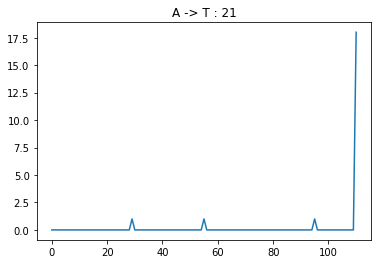

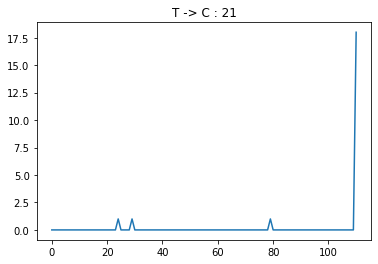

In [22]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [23]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)